In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
# Importing Dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [25]:
# Data loading
car_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/car data.csv')

In [26]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [27]:
# total data-points
car_dataset.shape

(301, 9)

In [28]:
# getting more familier with dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [18]:
# checking distribution of categorical data
car_dataset.Car_Name.value_counts()

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
KTM 390 Duke                 1
Activa 4g                    1
TVS Sport                    1
Royal Enfield Bullet 350     1
Hero Honda CBZ extreme       1
Name: Car_Name, Length: 98, dtype: int64

In [19]:
car_dataset.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [20]:
car_dataset.Seller_Type.value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [21]:
car_dataset.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [34]:
# label encoding
car_dataset_label = car_dataset.copy()
car_dataset_label.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)
car_dataset_label.replace({'Seller_Type':{'Dealer':0, 'Individual':1}}, inplace=True)
car_dataset_label.replace({'Transmission':{'Manual':0, 'Automatic':1}}, inplace=True)

In [42]:
car_dataset_label.drop(columns=['Car_Name'], axis=1, inplace=True)
car_dataset_label.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,0,0,0,0
1,2013,4.75,9.54,43000,1,0,0,0
2,2017,7.25,9.85,6900,0,0,0,0
3,2011,2.85,4.15,5200,0,0,0,0
4,2014,4.60,6.87,42450,1,0,0,0


In [39]:
# dummy encoding
car_dataset_dummy = car_dataset.copy()
car_dataset_dummy = pd.get_dummies(car_dataset.drop(columns=['Car_Name'], axis=1))

In [40]:
car_dataset_dummy.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,0,1,1,0,0,1
1,2013,4.75,9.54,43000,0,0,1,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,0,1,1,0,0,1
3,2011,2.85,4.15,5200,0,0,0,1,1,0,0,1
4,2014,4.60,6.87,42450,0,0,1,0,1,0,0,1


In [44]:
#splitting feature and dependant variable
X = car_dataset_label.drop(columns=['Selling_Price'], axis=1)
y = car_dataset_label.Selling_Price

# X = car_dataset_dummy.drop(columns=['Selling_Price'], axis=1)
# y = car_dataset_dummy.Selling_Price

print(X.head())
print(y.head())

   Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  Owner
0  2014           5.59       27000          0            0             0      0
1  2013           9.54       43000          1            0             0      0
2  2017           9.85        6900          0            0             0      0
3  2011           4.15        5200          0            0             0      0
4  2014           6.87       42450          1            0             0      0
0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64


In [47]:
# splitting data into train, test split
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.1)
# stratify = y; will give error in regression cases

In [48]:
# Linear_Regression model
linear_r = LinearRegression()

In [49]:
linear_r.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
print(f"coefficients = {linear_r.coef_} \n intercept = {linear_r.intercept_}")

coefficients = [ 4.09426126e-01  4.38728846e-01 -6.73100388e-06  1.76308349e+00
 -1.00417660e+00  1.50736348e+00 -8.74133473e-01] 
 intercept = -823.0159622132916


In [51]:
# training data prediction
train_data_pred = linear_r.predict(x_train)
print(f"r2 = {metrics.r2_score(y_train, train_data_pred)}")

r2 = 0.8799451660493711


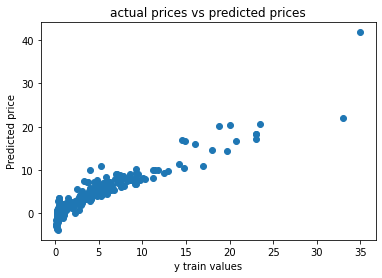

In [52]:
plt.scatter(y_train, train_data_pred)
plt.ylabel('Predicted price')
plt.xlabel('y train values')
plt.title('actual prices vs predicted prices')
plt.show()

In [53]:
# predicting for test data
test_data_pred = linear_r.predict(x_test)
print(f"r2= {metrics.r2_score(y_test, test_data_pred)}")

r2= 0.8365766715027051


In [54]:
# we will use Lasso Regression, as linear regression mostly performs well if there are correlation among variable

In [55]:
# lasso regression
lasso_r = Lasso()

In [56]:
lasso_r.fit(x_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [57]:
train_data_pred = lasso_r.predict(x_train)
print(metrics.r2_score(y_train, train_data_pred))

0.8427856123435794


In [58]:
# predicting for test data
test_data_pred = lasso_r.predict(x_test)
print(f"r2= {metrics.r2_score(y_test, test_data_pred)}")

r2= 0.8709167941173195
